<a href="https://colab.research.google.com/github/PullanC/MDMMagneticMirrors/blob/main/MDM_graphing_TM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-60-591ea8cb5e30>:32: RuntimeWarning: divide by zero encountered in double_scalars
  freq = 2/((SD[k]**2) * sigma_2 * mu_2)


[(0.16951587590520262+0j), (0.001695074007470389+0j), (0.001198628288380813+0j), (0.0009786840545928555+0j), (0.0008475687849824161+0j), (0.0007580904627121804+0j), (0.0006920398984727081+0j), (0.0006407052105826291+0j), (0.000599325381084804+0j), (0.0005650497805272811+0j), (0.0005360535871576623+0j), (0.00051110727350495+0j), (0.0004893481439825674+0j), (0.00047015063987132294+0j), (0.0004530486171550824+0j), (0.0004376866505793382+0j), (0.0004237883654264338+0j), (0.00041113517994315844+0j), (0.0003995516413736911+0j), (0.000388895067328306+0j), (0.0003790480741704508+0j), (0.0003699130872709987+0j), (0.00036140824038494846+0j), (0.000353464266977706+0j), (0.0003460221118452678+0j), (0.0003390310737489358+0j), (0.000332447344949721+0j), (0.00032623285115159623+0j), (0.0003203543214552598+0j), (0.00031478253629791455+0j), (0.00030949171447599216+0j), (0.000304459009840349+0j), (0.00029966409520358216+0j), (0.00029508881614461813+0j), (0.0002907169012448131+0j), (0.0002865337181970356

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.1, 1.1)

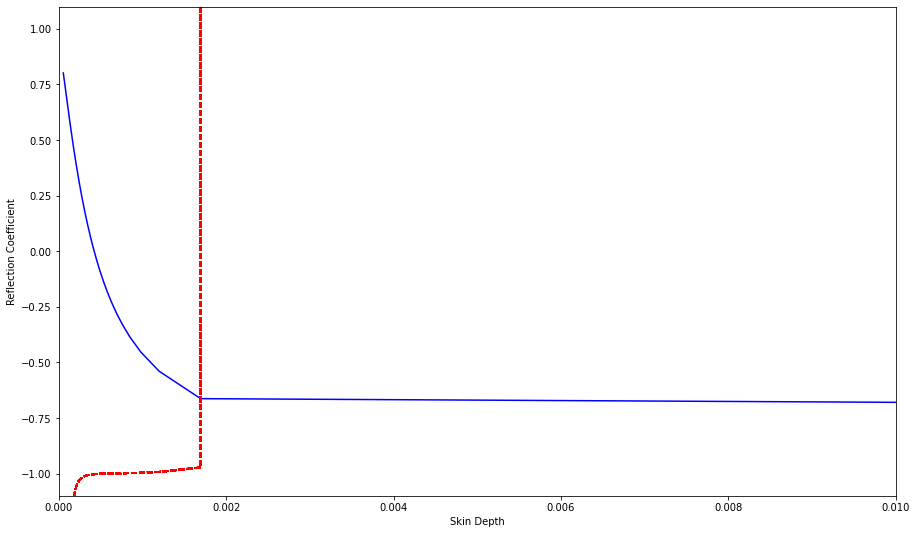

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from cmath import sqrt
from mpl_toolkits import mplot3d

#First list all the variables you've got
sigma_1 = 0
sigma_2 = 58000000       #sigma_2 = 58000000 for copper
epsilon_1 = 1     #epsilon_2 = 0.000001 for copper
epsilon_2 = 1
mu_1 = 0.0000012
mu_2 = 0.0000012             #mu_2 = 0.0000012 for copper
#Kx = np.arange(0.00001, 1000, 1)
pi = 3.1415
#omega = 2 * pi * Kx/ sqrt(epsilon_1 * mu_1)
Kx = []
omega = np.arange(1, 10000000, 10000)

c = 299792458

for k in range(len(omega)):
  KxA = sqrt((omega[k]**2) * ((mu_1*epsilon_1)- (1/c)))
  Kx.append(KxA)

skindepths = []
SD_asym = np.arange(0, 0.01, 0.0001)
freqs = []
WaveNos = []

def values_from_SD(SD, epsilon_2, mu_2):
  for k in range(len(SD)):
    freq = 2/((SD[k]**2) * sigma_2 * mu_2)
    WaveNo = ((sqrt(epsilon_2 * mu_2)) * freq) / (2 * pi)
    freqs.append(freq)
    WaveNos.append(WaveNo)

def skin_depths(omega, sigma_2, mu_2):
   for i in range(len(omega)):
      delta = sqrt(2/(omega[i] * sigma_2 * mu_2))
      skindepths.append(delta)

skin_depths(omega, sigma_2, mu_2)
K0_full = []
K1_full = []
R_full_TM = []
R_cond = []
R_conductive_magnetic_TM = []
R_expanded_TM = []
R_asm = []
R_TE_full = []
R_TM_Mag_mirs = []
R_TE_cond = []
TE_cond_asm = []
R_TE_expansion  =[]
R_TM_A = []
R_TM_Expansion = []
R_TEexpansion = []
values_from_SD(SD_asym, epsilon_2, mu_2)

def K_0(omega, mu_1, epsilon_1, waves):
    for i in range(len(omega)):
        K0 = sqrt(((omega[i]**2) * mu_1 * epsilon_1) - (waves[i]**2))
        #print(K0)
        K0_full.append(K0)

def K_1(omega, mu_2, epsilon_2, sigma_2, Kx):
    for i in range(len(omega)):
        K1 = sqrt(omega[i] * mu_2 * ((omega[i] * epsilon_2) - (sigma_2 * 1j)) - (Kx[i]**2))
        #print(K1)
        K1_full.append(K1)

def R_expand_TM(omega, mu_1, epsilon_1, mu_2, epsilon_2, sigma_1, Kx, skindepths):
    for i in range(len(Kx)):
        numerator = ((sigma_1 + (1j * omega[i] * epsilon_1))*(sqrt((omega[i]**2 * mu_2 * epsilon_2) - (2j / skindepths[i]**2) - (Kx[i]**2)))) - (((2/(skindepths[i]**2 * omega[i] * mu_2)) + (1j * omega[i] * epsilon_2)) * sqrt(((omega[i]**2) * mu_1 * epsilon_1) - (Kx[i]**2)))
        denominator = ((sigma_1 + (1j * omega[i] * epsilon_1))*(sqrt((omega[i]**2 * mu_2 * epsilon_2) - (2j / skindepths[i]**2) - (Kx[i]**2)))) + (((2/(skindepths[i]**2 * omega[i] * mu_2)) + (1j * omega[i] * epsilon_2)) * sqrt(((omega[i]**2) * mu_1 * epsilon_1) - (Kx[i]**2)))
        R = numerator/denominator
        R_expanded_TM.append(R)

K_0(omega, mu_1, epsilon_1, Kx)
K_1(omega, mu_2, epsilon_2, sigma_2, Kx)

#Then use these to calculate the reflection coefficient from the original equation

def Ref_coeff_TM(K0, K1, sigma_2, omega, epsilon_2, sigma_1, epsilon_1):
    for k in range(len(K0)):
        R = ((K1[k]/(sigma_2 + (omega[k] * epsilon_2 * 1j))) - (K0[k]/(sigma_1 + (omega[k] * epsilon_1 * 1j)))) / ((K1[k]/(sigma_2 + (omega[k] * epsilon_2 * 1j))) + (K0[k]/(sigma_1 + (omega[k] * epsilon_1 * 1j))))
        R_full_TM.append(R)

def Ref_TM_conductive_magnetic_mirrors(Kx, sigma_2, omega, epsilon_2, sigma_1, epsilon_1, skindepths):
    for k in range(len(K0)):
        R = -1 + (((2*(sigma_1 + (1j * omega[k] * epsilon_2))* (sqrt((omega[k]**2 * mu_2 * epsilon_2) - (2j / skindepths[k]**2) - (Kx[k]**2)))))/((((sigma_1 + (1j * omega[k] * epsilon_2)) * (sqrt((omega[k]**2 * mu_2 * epsilon_2) - (2j / skindepths[k]**2) - (Kx[k]**2)))) + (2j * Kx[k] / (skindepths[k]**2 * omega[k] * mu_2)))))
        R_conductive_magnetic_TM.append(R)
    #To be used when sigma_1 is zero, sigma_2 >> 0, mu_2>>mu_1, epsilon_1 = epsilon_2
    #Conductive magnetic Mirrors
    #DO NOT TOUCH THIS. IT WORKS DONT MESS WITH IT.

def R_TM_Conductive_Mirrors(skindepth, mu_2, epsilon_2, Kx, omega, sigma_1):
    for k in range(len(Kx)):
        R = -1 + (((2*(sigma_1 + (1j * omega[k] * epsilon_2))* (sqrt((omega[k]**2 * mu_2 * epsilon_2) - (2j / skindepths[k]**2) - (Kx[k]**2)))))/((sigma_1 + (1j * omega[k] * epsilon_2)) * (sqrt((omega[k]**2 * mu_2 * epsilon_2) - (2j / skindepths[k]**2) - (Kx[k]**2))) + ((2 * sqrt((omega[k]**2 * mu_1 * epsilon_1) - Kx[k]**2 ))/(skindepths[k]**2 * omega[k] * mu_2))))
        R_cond.append(R)
        #DO NOT TOUCH THIS. IT WORKS DONT MESS WITH IT.
        #To be used when sigma_1 is zero, sigma_2 >> 0, mu_2 = mu_1, epsilon_1 = epsilon_2

def R_TM_Magnetic_mirrors(omega, epsilon_2, mu_2, sigma_1, Kx):
    for k in range(len(Kx)):
        R = 1 - ((2 * omega[k] * epsilon_2 * Kx[k])/((sigma_1 + (1j * omega[k] * epsilon_2)) * (sqrt(((omega[k]**2) * epsilon_2 * mu_2) - Kx[k]**2)) + (omega[k] * epsilon_2 * Kx[k])))
        #(((sigma_1 + (1j * omega[k] * epsilon_2)) * sqrt(((omega[k]**2) * epsilon_2 * mu_2) - (Kx[k]**2))) - (omega[k] * epsilon_2 * Kx[k]))/(((sigma_1 + (1j * omega[k] * epsilon_2)) * sqrt(((omega[k]**2) * epsilon_2 * mu_2) - (Kx[k]**2))) + (omega[k] * epsilon_2 * Kx[k]))
        #-1 + ((2 * sqrt((omega[k]**2 * mu_2 * epsilon_2)-(Kx[k]**2)) * (sigma_1 + 1))/((sqrt(((omega[k]**2) * mu_2 * epsilon_2) - Kx[k]**2) * (sigma_1 + 1)) - (1j * Kx[k])))
        #To be used when mu_2>>mu_1, epsilon_1 = epsilon_2, sigma_2 = 0
        #MAGNETIC MIRRORS HAVE NO DEPENDANCY ON THE WAVENUMBER OR THE 
        R_TM_Mag_mirs.append(R)

def R_asymptotic(K0, skindepths, mu_2, epsilon_2, waves, frequency, sigma_1, epsilon_1):
    for k in range(len(waves)):
        R = -1*( -1 + ((frequency[k] * mu_2 /K0[k]) * skindepths[k] * (sigma_1 + (1j * frequency[k] * epsilon_1)) * (sqrt(1/(mu_2 * frequency[k]))) * (sqrt(-2j))) + (((frequency[k] **2) * (mu_2**2) * (skindepths[k]**3)/K0[k]) * (sigma_1 + (1j * frequency[k] * epsilon_1)) * (sqrt(1/(mu_2 * frequency[k]))) * (1/(2 * (sqrt(-2j)))) * (((frequency[k]**2) * mu_2 * epsilon_2) - (waves[k]**2))))
        R_asm.append(R)

def R_TM_AsymptoticMagCond():
  for k in range(len(omega)):
    R = -1 + (skindepths[k]**2 * (1j * omega[k]**2 * mu_2 * epsilon_1 * sqrt(-2j/skindepths[k]**2))/sqrt((omega[k]**2 * mu_1 * epsilon_1) - Kx[k]**2)) - ((1j * omega[k]**4 * mu_2 **2 * epsilon_1 **2 * skindepths[k]**2)/((omega[k]**2 * mu_1 * epsilon_1) - Kx[k]**2))
    R_TM_A.append(R)

def TE_full(K0, K1, mu_1, mu_2):
  for k in range(len(K0)):
    R = ((K0[k] * mu_2) - (K1[k]*mu_1))/((K0[k] * mu_2) + (K1[k]*mu_1))
    R_TE_full.append(R)

def TE_conductive_mirrors(sd, fr, mu_1, epsilon_1, Kx, mu_2):
    for k in range(len(omega)):
        R = -1 + ((sd[k]**2) * ((fr[k]**2 * mu_1 * epsilon_1) + (Kx[k]**2) + ((sqrt((fr[k]**2 * mu_1 * epsilon_1) - (Kx[k]**2))) * (sqrt((fr[k]**2 * mu_2 * epsilon_1) - (Kx[k]**2) - (2j / (sd[k]**2)))))))
        R_TE_cond.append(R)
      
def TE_conductive_mirrors_asymptotic(sd, fr, mu_1, epsilon_1, Kx, mu_2):
    for k in range(len(omega)):
        R = -1 + ((sd[k]**2) * (sqrt((-2j * ((fr[k]**2 * mu_1 * epsilon_1) - (Kx[k]**2)))/(sd[k]**2)))) + ((sd[k]**2) * ((fr[k]**2 * mu_1 * epsilon_1) - (Kx[k]**2))) - ((sd[k]**4) * (1j / (2 * sqrt(2))) * ((Kx[k]**2) - (fr[k]**2 * mu_2 * epsilon_1)) * sqrt((1j * ((fr[k]**2 * mu_1 * epsilon_1) - (Kx[k]**2)))/(sd[k]**2))) + ((sd[k]**5) * sd[k] * (((Kx[k]**2) - (fr[k]**2 * mu_2 * epsilon_1))**2) * sqrt((1j * ((fr[k]**2 * mu_1 * epsilon_1) - (Kx[k]**2)))/(sd[k]**2)) * (1/(16*sqrt(2))))
        TE_cond_asm.append(R)

def TE_expansion(mu_1, mu_2, omega, epsilon, Kx, skindepths):
  for k in range(len(omega)):
    R = -1 - (4 * sqrt(2j) * mu_1**3 * mu_2 * sqrt((omega[k]**2 * mu_1 * epsilon_1) - Kx[k]**2) * sqrt(-1j / skindepths[k]**2)) - (1j * skindepths[k]**2 * (omega[k]**2 * mu_1 * epsilon_1 * (mu_2**2 + mu_1**2)) / mu_1**2)
    R_TE_expansion.append(R)

def TM_Full_Expansion():
  for k in range(len(omega)):
    R =  -1 + ((sqrt(2j/(mu_2 * omega[k]))) * (1/K0_full[k]) * skindepths[k]) + ((mu_2 * omega[k] * (skindepths[k]**2) / (K0_full[k]**2)) * (((2 * K0_full[k] * (sigma_1 + (1j * omega[k] * epsilon_1)) * (((omega[k]**2) * mu_2 * epsilon_2) - Kx) * skindepths[k]) - (2j * omega[k] * mu_2))/(((sqrt(1/(mu_2 * omega[k]))) * (((skindepths[k] ** 2) * mu_2 * omega[k] * (sigma_1 + (1j * omega[k] * epsilon_1))) - 2j) ) ) ))
    R_TM_Expansion.append(R)

def TE_Mode_asymptotic_expansion(K0_full, mu_2, mu_1, Kx, omega, epsilon_2, skindepths):
  for k in range(len(omega)):
    R = -1 + (1j * K0_full[k] * omega[k] * (mu_2**2) * (skindepths[k]**2) * sqrt(2j/(omega[k] * mu_2 * (skindepths[k]**2)))) + ((2j * (skindepths[k]**3)/(omega[k] * mu_2)) * ((K0_full[k] * mu_2 * (mu_1**2) * ((omega[k]**2 * mu_2 * epsilon_2) - (Kx[k]**2))) - (2 * (K0_full[k]**3) * (mu_2**2))) / ((mu_1**3) * (-5j))) + ((((K0_full[k]**4) * (mu_2**4)) + (((K0_full[k]**2) * (mu_2**2) * (mu_1**2) * ((Kx[k]**2) - ((omega[k]**2) * mu_2 * epsilon_2))))) * (skindepths[k]**4)/2)
   #(1j * K0_full[k] * omega[k] * (mu_2**2) * (skindepths[k]**2) * sqrt(2j/(omega[k] * mu_2 * (skindepths[k]**2))))
    #((((K0_full[k]**4) * (mu_2**4)) + (((K0_full[k]**2) * (mu_2**2) * (mu_1**2) * ((Kx[k]**2) - ((omega[k]**2) * mu_2 * epsilon_2))))) * (omega[k]**2) * (mu_2**2) * (skindepths[k]/2))
    R_TEexpansion.append(R)

K0 = np.array(K0_full)
K1 = np.array(K1_full)

Ref_coeff_TM(K0_full, K1_full, sigma_2, omega, epsilon_2, sigma_1, epsilon_1)
Ref_TM_conductive_magnetic_mirrors(Kx, sigma_2, omega, epsilon_2, sigma_1, epsilon_1, skindepths)
R_TM_Conductive_Mirrors(skindepths, mu_2, epsilon_2, Kx, omega, sigma_1)
R_expand_TM(omega, mu_1, epsilon_1, mu_2, epsilon_2, sigma_1, Kx, skindepths)
R_asymptotic(K0_full, skindepths, mu_2, epsilon_2, Kx, omega, sigma_1, epsilon_1)
TE_full(K0_full, K1_full, mu_1, mu_2)
R_TM_Magnetic_mirrors(omega, epsilon_2, mu_2, sigma_1, Kx)
TE_conductive_mirrors(skindepths, omega, mu_1, epsilon_1, Kx, mu_2)
TE_conductive_mirrors_asymptotic(skindepths, omega, mu_1, epsilon_1, Kx, mu_2)
TE_expansion(mu_1, mu_2, omega, epsilon_1, Kx, skindepths)
R_TM_AsymptoticMagCond()
TM_Full_Expansion()
TE_Mode_asymptotic_expansion(K0_full, mu_2, mu_1, Kx, omega, epsilon_2, skindepths)

# extract real part
#x = [ele.real for ele in KxAs]
# extract imaginary part
#y = [ele.imag for ele in KxAs]

print(skindepths)
#print(R_TM_Mag_mirs)

#plt.subplots()
plt.figure(figsize=(15,9))
plt.plot(skindepths, R_full_TM , 'b', label = 'Data')
plt.plot(skindepths, R_TM_Expansion, 'r--', label = 'Data')
#plt.axhline(y=1, xmin=0.0, xmax=1000000, color='r', linestyle='--')
plt.xlabel('Skin Depth')
plt.ylabel('Reflection Coefficient')



plt.xlim([0, 0.01])
plt.ylim([-1.1,1.1])

